# Homework Data Visualization

$\textbf{Ubah nama di bawah yaa!}$

- Nama: Aminudin
- Cita-cita semasa kecil: Jadi penduduk syurga

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# please import as much as you need

In [2]:
# read your data

df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Normal

## Dalam rata-rata, payment method mana yang memiliki monthly charge terbesar per customernya?

Hint: Gunakan groupby payment method terhadap monthly charge dengan aggregate function rata-rata

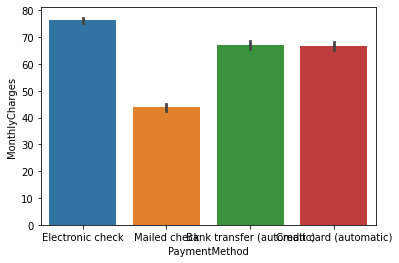

In [4]:
# your code goes here!
df.groupby("PaymentMethod").agg(
    avg_monthlycharges = ("MonthlyCharges","mean"))

# plot
sns.barplot(x = 'PaymentMethod',
            y = 'MonthlyCharges',
            data=df);
plt.show()

Jadi, dari plot di atas, dapat disimpulkan bahwa...

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

Jadi, dari plot di atas, dapat disimpulkan bahwa rata-rata pembayaran berdasarkan payment method yang memiliki nilai tertinggi adalah electronic check.


## Bagaimana jumlah customer dilihat dari tenure group?

Tenure group:
- low_tenure: User dengan tenure < 21 bulan
- medium_tenure: User dengan tenure 21 - 40 bulan
- high_tenure: User dengan tenure > 40 bulan

Hint:
- Memotong data integer menjadi group categorical dapat menggunakan beberapa macam cara, contohnya dengan numpy.where atau pandas.cut
- Mirip dengan plot pertama, namun ini menghitung jumlah unique users

In [5]:
# your code goes here!
import numpy as np
df['tenure_group'] = np.where(df['tenure'] > 40,'high',
                                  np.where(df['tenure'] < 21, 'medium', 'low'))
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,medium
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,low
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,medium
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,high
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,medium


In [6]:
df_tenure = df.groupby('tenure_group').agg( {'tenure' : 'nunique'}).reset_index()
df_tenure.head()

,tenure_group,tenure
0,high,32
1,low,20
2,medium,21


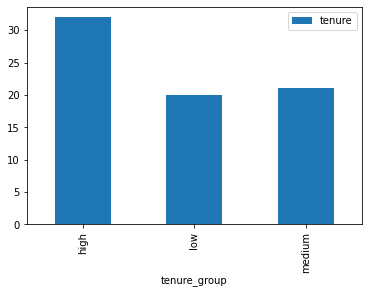

In [7]:
# plot
df_tenure.plot(x = 'tenure_group',y = 'tenure',
        kind='bar');

Jadi, dari plot di atas, kami menyimpulkan bahwa...

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

jadi, dari plot di atas, kami menyimpulkan bahwa jumlah customer berdasarkan tenure group adalah termasuk dalam group high dengan total tenure berdasarkan nilai unique adalah 32 bulan  

## Apakah kebanyakan dari Senior Citizen berlangganan PhoneService?

Hint:
- Dapat menggunakan feature/input parameter hue pada seaborn
- Dalam menghitung jumlah unique customer, jangan lupa perhatikan angka rasio, tidak hanya angka absolutnya



In [14]:
# your code goes here!
df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
# membuat rasio
from pandas.core.api import DataFrame

In [21]:
df_copy = df.copy()

df_rasio1 = df_copy.groupby(['SeniorCitizen', 'PhoneService'])['customerID'].nunique().reset_index()
df_rasio1['rasio'] = (df_rasio1['customerID']/df_rasio1['customerID'].sum())*100
df_rasio1.head()

,SeniorCitizen,PhoneService,customerID,rasio
0,0,No,578,8.206730
1,0,Yes,5323,75.578589
2,1,No,104,1.476643
3,1,Yes,1038,14.738038


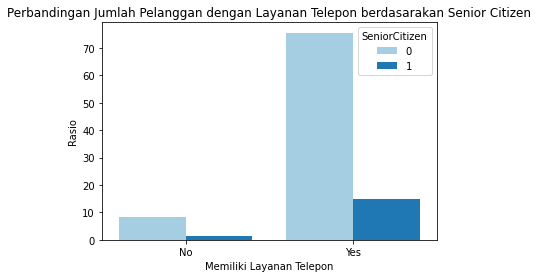

In [54]:
sns.barplot(x = df_rasio1['PhoneService'], y = df_rasio1['rasio'], hue=df_rasio1['SeniorCitizen'], data = df_rasio1,
            palette = 'Paired',
            capsize = 0.05,
            saturation = 8,
            errcolor = 'red', errwidth= 2,
            ci = 'sd')
plt.title('Perbandingan Jumlah Pelanggan dengan Layanan Telepon berdasarakan Senior Citizen')
plt.xlabel('Memiliki Layanan Telepon')
plt.ylabel('Rasio')
plt.show()

Jadi, dari plot di atas, dapat disimpulkan bahwa...

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

Jadi, dari plot di atas, dapat disimpulkan bahwa rasio customer yang memiliki layanan telepon sebesar 75%

## Bagaimana Distribusi dari TotalCharge?

Hint:
- Ubah datatype TotalCharge dari object ke int atau float
- Buat distribusi plot!

In [24]:
# your code goes here!
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

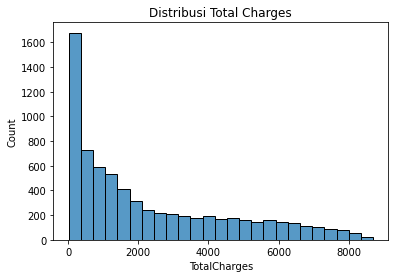

In [26]:
sns.histplot(df['TotalCharges'])
plt.title('Distribusi Total Charges')
plt.show()

Dari histogram tersebut dapat diambil kesimpulan bahwa semakin tinggi total biaya yang keluarkan jumlah pelanggan sedikit. atau lebih banyak yang menghabiskan biaya lebih sedikit. Hal ini dapat dilihat dari pola nya yang menunjukan negatif skewed.

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

# Intermediate

## Apakah customer yang memiliki monthly charges yang tinggi cenderung churn?

Hint: dapat ditunjukan melalui distribusi data

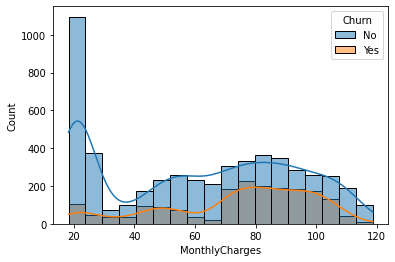

In [31]:
# your code goes here!
sns.histplot(df, x='MonthlyCharges', kde=True, hue='Churn')
plt.show()

Jadi, dari plot di atas, dapat disimpulkan bahwa semakin rendah pendapatan maka akan semakin besar kemungkinan pelanggan akan churn, sedangkan untuk pelanggan yang memiliki monthly charges yang tinggi kemungkinan churn akan lebih rendah.

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

## Bagaimana pengaruh memiliki partner & dependents terhadap tingkat churn customer?

Hint: concat partner dan dependents, gunakan parameter 'hue' pada seaborn untuk mempermudah

In [33]:
# your code goes here!
# concat data partner dan dependents
df1 = df.copy()

df1['partner_dependents'] = df1['Partner'] + '_' + df1['Dependents']
df1['partner_dependents'].value_counts()

No_No      3280
Yes_Yes    1749
Yes_No     1653
No_Yes      361
Name: partner_dependents, dtype: int64

In [37]:
# gabungankan data untuk melihat rasio
df2 =  df1.groupby(['Churn','partner_dependents'])['customerID'].nunique().reset_index()
df2['rasio_dependent'] = (df2['customerID']/df2['customerID'].sum())*100
df2

,Churn,partner_dependents,customerID,rasio_dependent
0,No,No_No,2157,30.626154
1,No,No_Yes,284,4.032373
2,No,Yes_No,1233,17.506744
3,No,Yes_Yes,1500,21.297742
4,Yes,No_No,1123,15.944910
5,Yes,No_Yes,77,1.093284
6,Yes,Yes_No,420,5.963368
7,Yes,Yes_Yes,249,3.535425


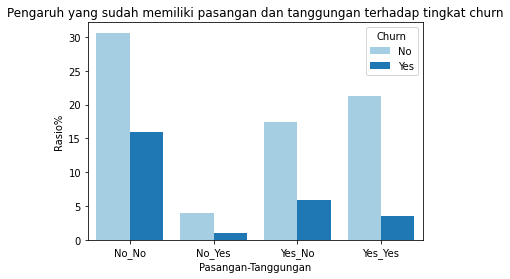

In [55]:
# plot
sns.barplot(x = df2['partner_dependents'], y = df2['rasio_dependent'], hue = df2['Churn'], data = df2,
            palette = 'Paired',
            capsize = 0.5,
            saturation = 8,
            errcolor = 'red', errwidth=2,
            ci = 'sd')

plt.title('Pengaruh yang sudah memiliki pasangan dan tanggungan terhadap tingkat churn')
plt.xlabel('Pasangan-Tanggungan')
plt.ylabel('Rasio%')
plt.show()

Jadi, dari plot di atas, dapat disimpulkan bahwa terdapat pengaruh bagi pelanggan yang sudah memiliki pasangan dan tanggungan akan churn memiliki rasio 3,5%, sedangkan yang belum memiliki pasangan dan tanggungan memiliki rasio sebesar 30,6%

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

# Soal Hard

## Buatlah satu insight dari data telco customer, dan sertakan storyline pada visualisasi tersebut! dengan hanya memanfaatkan atribut PaymentMethod, CustomerID, dan Churn!

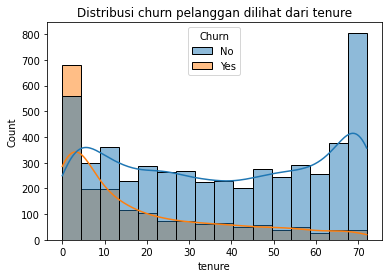

In [61]:
# your code goes here!
# Churn terbanyak pada saat tenure berapa ?

sns.histplot(df, x='tenure', kde=True, hue='Churn')
plt.title('Distribusi churn pelanggan dilihat dari tenure')
plt.show()

Dari tabel di atas menunjukan bahwa tenure 0-5 bulan yang memiliki kecenderungan akan churn.

In [43]:
# Melihat dari jenis contract apa yang digunakan oleh pelanggan yang churn
df_contract = df.groupby(['Churn', 'Contract'])['customerID'].nunique().reset_index()
df_contract['rasiochurn_contract'] = df_contract['customerID']/df_contract['customerID'].sum()
df_contract

,Churn,Contract,customerID,rasiochurn_contract
0,No,Month-to-month,2220,0.315207
1,No,One year,1307,0.185574
2,No,Two year,1647,0.233849
3,Yes,Month-to-month,1655,0.234985
4,Yes,One year,166,0.023570
5,Yes,Two year,48,0.006815


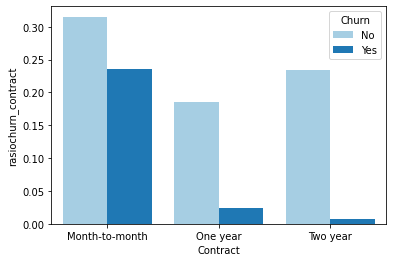

In [58]:
sns.barplot(x = 'Contract', y = 'rasiochurn_contract', hue = 'Churn', data = df_contract,
            palette ='Paired',
            capsize = 0.05,
            saturation = 8,
            errcolor = 'red', errwidth =2,
            ci = 'sd')
plt.show()

Dari diagram di atas dapat di simpulkan bahwa kontrak jenis month to month memiliki banyak pelanggan yang churn dibandingkan dengan jenis kontrak lain, churn tertinggi ada pada kontrak jenis two year.

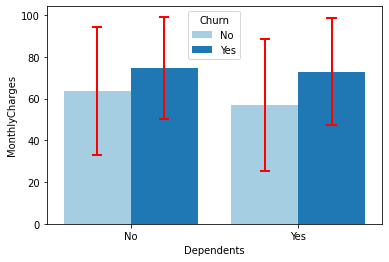

In [64]:
sns.barplot(x = df['Dependents'], y = df['MonthlyCharges'], hue = df['Churn'], data=df,
            palette ='Paired',
            capsize =0.05,
            saturation = 8,
            errcolor='red', errwidth = 2,
            ci= 'sd')
plt.show()